# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!jupyter nbconvert --to html Notebook.ipynb

[NbConvertApp] Converting notebook Notebook.ipynb to html
[NbConvertApp] Writing 485666 bytes to Notebook.html


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Great Learning Course/FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# To show the row and columns of data.
df_shape = df.shape

In [ ]:
print('This data contains', df_shape[0] , 'Rows and ', df_shape[1], 'Columns.')

This data contains 1898 Rows and  9 Columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


These are different datatypes of columns in dataset.
 

*   order_id, customer_id, food_preperation_time, delivery_time are (int) datatype.
*   resturent_name, cusine_type, day_of_the_week are (object) datatype. 
*   cost_of_the_order is float datatype.


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


We can see that there are mixed data type values in the column like - 'Not Given' which should actually be read as missing values (NaN). So, I'll replace it with null values.

*   We can also replace it with mean of ratings or with zero value. But it will change the data, as cutomer didn't gave rating to that resturant. 




In [ ]:
#Checking the unique values of columns to fins the missing value.

#df['order_id'].unique()
#df['customer_id'].unique()
#df['restaurant_name'].unique()
#df['cuisine_type'].unique()
#df['cost_of_the_order'].unique()
#df['day_of_the_week'].unique()

#To get the unique values of rating column.
df['rating'].unique()

#df['food_preparation_time'].unique()
#df['delivery_time'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# checking the count of different data types in reating column
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'], np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


There are 736 records are missing in the rating colum. Means huge number of orders are not rated by custmoers.

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000





*   Cost_of_the_order: average price of order is $16
 And Seventy-Five percent of orders have cost aprox. $22. and minimum and maximum coast of order are aprox. $4 and $35, respectively.
*   Average rating of orders is 4.
*   Average time for food preperation is 27 minutes.
*   Fastest order deliver in 15 Minutes and most waited order delivered in 33 Minutes.
*   Average delivery time is 24 minutes.


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [1]:
# Write the code here
df['rating'].isna().sum()

NameError: ignored

There are 736 Orders which does not have the Rating.

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

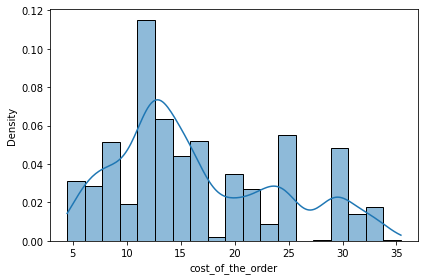

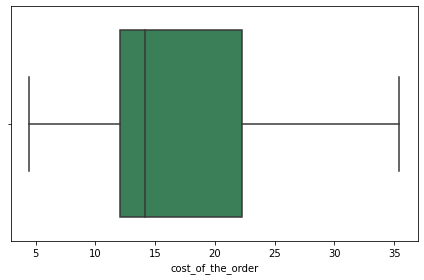

In [ ]:
# Write the code here
sns.histplot(data = df, x= 'cost_of_the_order', stat= 'density', kde=True)
plt.show()
sns.boxplot(data= df, x= 'cost_of_the_order', color= 'seagreen')
plt.show()


*   The distribution is skewed towards right.
*   There is no outlier in the data.
*   There are more orders in 50% and 75% distribution.

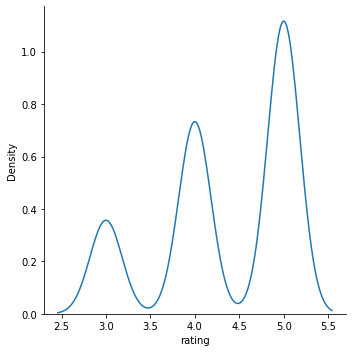

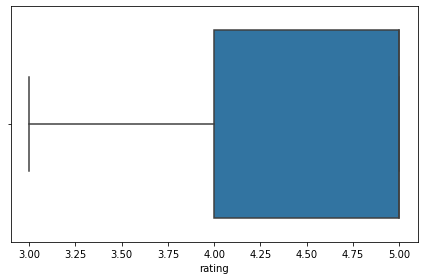

In [ ]:
sns.displot(data=df,x='rating',kind='kde')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

*   More density toward rating 5.
*   Mostly orders have rating 4 or 5.




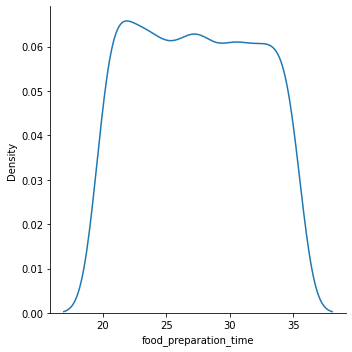

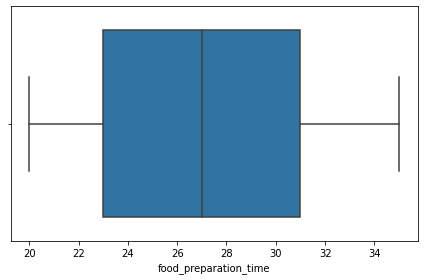

In [ ]:
sns.displot(data= df, x= df['food_preparation_time'], kind='kde')
plt.show()
sns.boxplot(data= df, x= df['food_preparation_time'])
plt.show()

Mostly preperation time is between 23 to 30 Minutes.

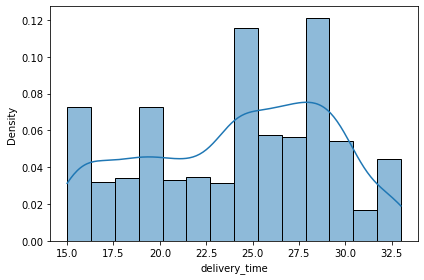

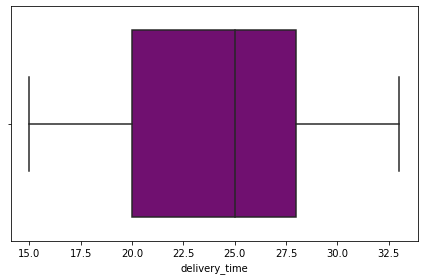

In [ ]:
# Write the code here
sns.histplot(data = df, x= 'delivery_time', stat= 'density', kde=True)
plt.show()
sns.boxplot(data= df, x= 'delivery_time', color= 'purple')
plt.show()

The distribution is skewed towards left. 50% of orders take less than 25 Minutes in delivery.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# To get top 5 resturents
top_resturents = df.groupby(['restaurant_name']).agg(orders = ('order_id', 'count'))
top_5_resturents = top_resturents.sort_values(by='orders', ascending=False)

In [ ]:
top_5_resturents.head()

,orders
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Top 5 resturents are:
*   Top resturent with most 219 orders is Shake Shack.
*   The Meatball Shop is on 2nd number with 132 orders



#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# To find the most ordered cuisine on weekends.
top_resturents = df.groupby(['cuisine_type', 'day_of_the_week']).agg(orders = ('order_id', 'count'))

top_5_resturents = top_resturents.sort_values(by='orders', ascending=False)

In [ ]:
top_5_resturents.head(1)  #to be review

,,orders
cuisine_type,day_of_the_week,
American,Weekend,415


Most popular cusine on Weeekend days is American Cuisine with 415 orders.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
order_greater_than_20 = df[df['cost_of_the_order'] > 20]

In [ ]:
order_greater_than_20.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,NaN,21,22


In [ ]:
order_greater_than_20.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,5.550000e+02,555.000000,555.000000,356.000000,555.000000,555.000000
mean,1.477525e+06,170853.052252,26.585423,4.367978,27.563964,24.010811
std,5.506783e+02,109653.986325,3.851349,0.729258,4.687428,5.134638
min,1.476560e+06,5139.000000,20.130000,3.000000,20.000000,15.000000
25%,1.477037e+06,83287.000000,24.200000,4.000000,23.000000,20.000000
50%,1.477520e+06,130956.000000,25.220000,5.000000,28.000000,25.000000
75%,1.478014e+06,262285.000000,29.250000,5.000000,32.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [ ]:
total_orders = 1898
orders_greater_than_20 = 555
percentage = (orders_greater_than_20 / total_orders) * 100

In [ ]:
percentage

29.24130663856691

In [ ]:
print('The Precentage of Orders which cost more than $20 is', percentage, '% .' )

The Precentage of Orders which cost more than $20 is 29.24130663856691 % .


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# To find the Mean of Delivery time.
mean = df["delivery_time"].mean()
print('The mean of the delivery time is ', mean, 'Minutes.')

The mean of the delivery time is  24.161749209694417 Minutes.


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top_resturents = df.groupby(['customer_id']).agg(orders = ('order_id', 'count'))
top_5_resturents = top_resturents.sort_values(by='orders', ascending=False)

In [ ]:
top_5_resturents.head(3)

,orders
customer_id,
52832,13
47440,10
83287,9


Top Customers are as following:


*   Cutomer with ID 522832 is top customer with 13 orders.
*   Cutomer with ID 47440 is on second number with 10 orders.
*   Cutomer with ID 83287 is on third number with 9 orders.



In [ ]:
# To calclate the revenue
df['revenue'] = df['cost_of_the_order'].apply(lambda x: (0.15 * x) if (x < 20 and x > 5) else (0.25 * x))

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


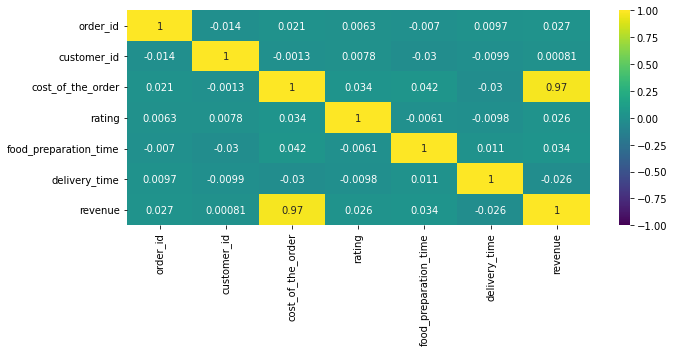

In [ ]:
#Making correlation heat map between columns
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(), annot= True, cmap='viridis',vmin= -1, vmax= 1)
plt.show()

This heat map gives the correlation information between attributes of data.


*   cost_of_the_order more correlated with rating
*   food_preperation_time negatively correlated with rating.
*   cost_of_the_order highly correlated with revenue, as cost of order increase revenue of company increase





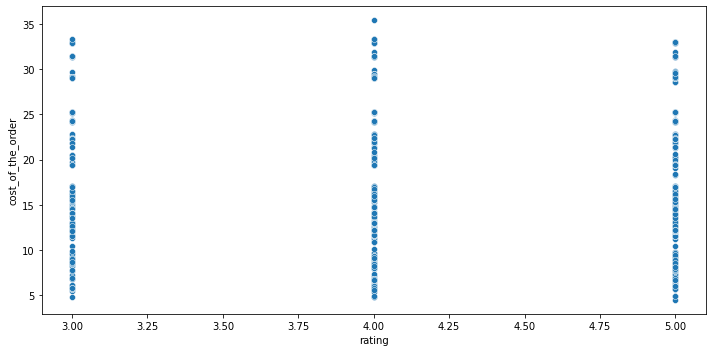

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.scatterplot(data= df, x='rating',y='cost_of_the_order')
plt.show()

More orders are with 4 rating.

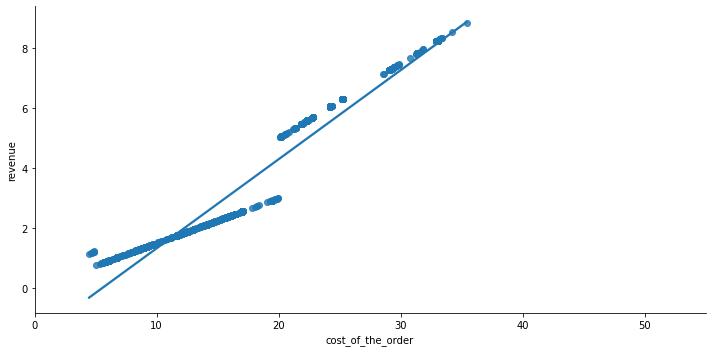

In [ ]:
sns.lmplot(data=df, x= 'cost_of_the_order',y='revenue',height=5,aspect=2)
plt.xlim(0,55)
plt.show()

A positive correlation or an increasing trend can be clearly observed between the cost of orders and revenue. The Revenue of company is increasing with cost of orders.

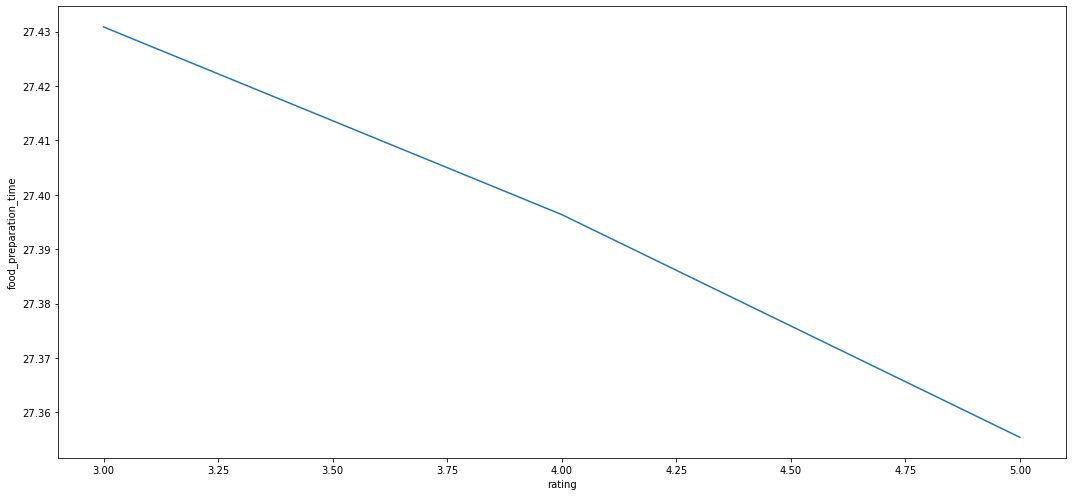

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='rating', y ='food_preparation_time', ci= None)
plt.show()

There is a negative realtionship between Food preperation time and Rating of order.

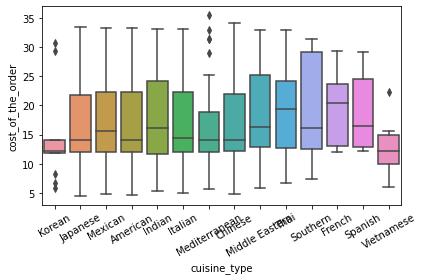

In [ ]:
from matplotlib import pyplot as plt
ax = sns.boxplot(data=df, x= 'cuisine_type', y= 'cost_of_the_order')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()



*   American Cuisine has high price
*   Southern Cuisine is second large in cost
*   Vietnamese cusine has cery low cost
*   Mediterranian cuisine has very high variation.


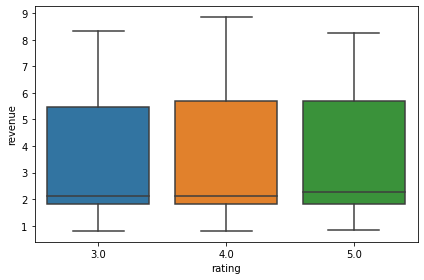

In [ ]:
sns.boxplot(data=df, x= 'rating', y= 'revenue', showfliers= False)
plt.show()

All ratings 3, 4, 5 have equal share in revenue.

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


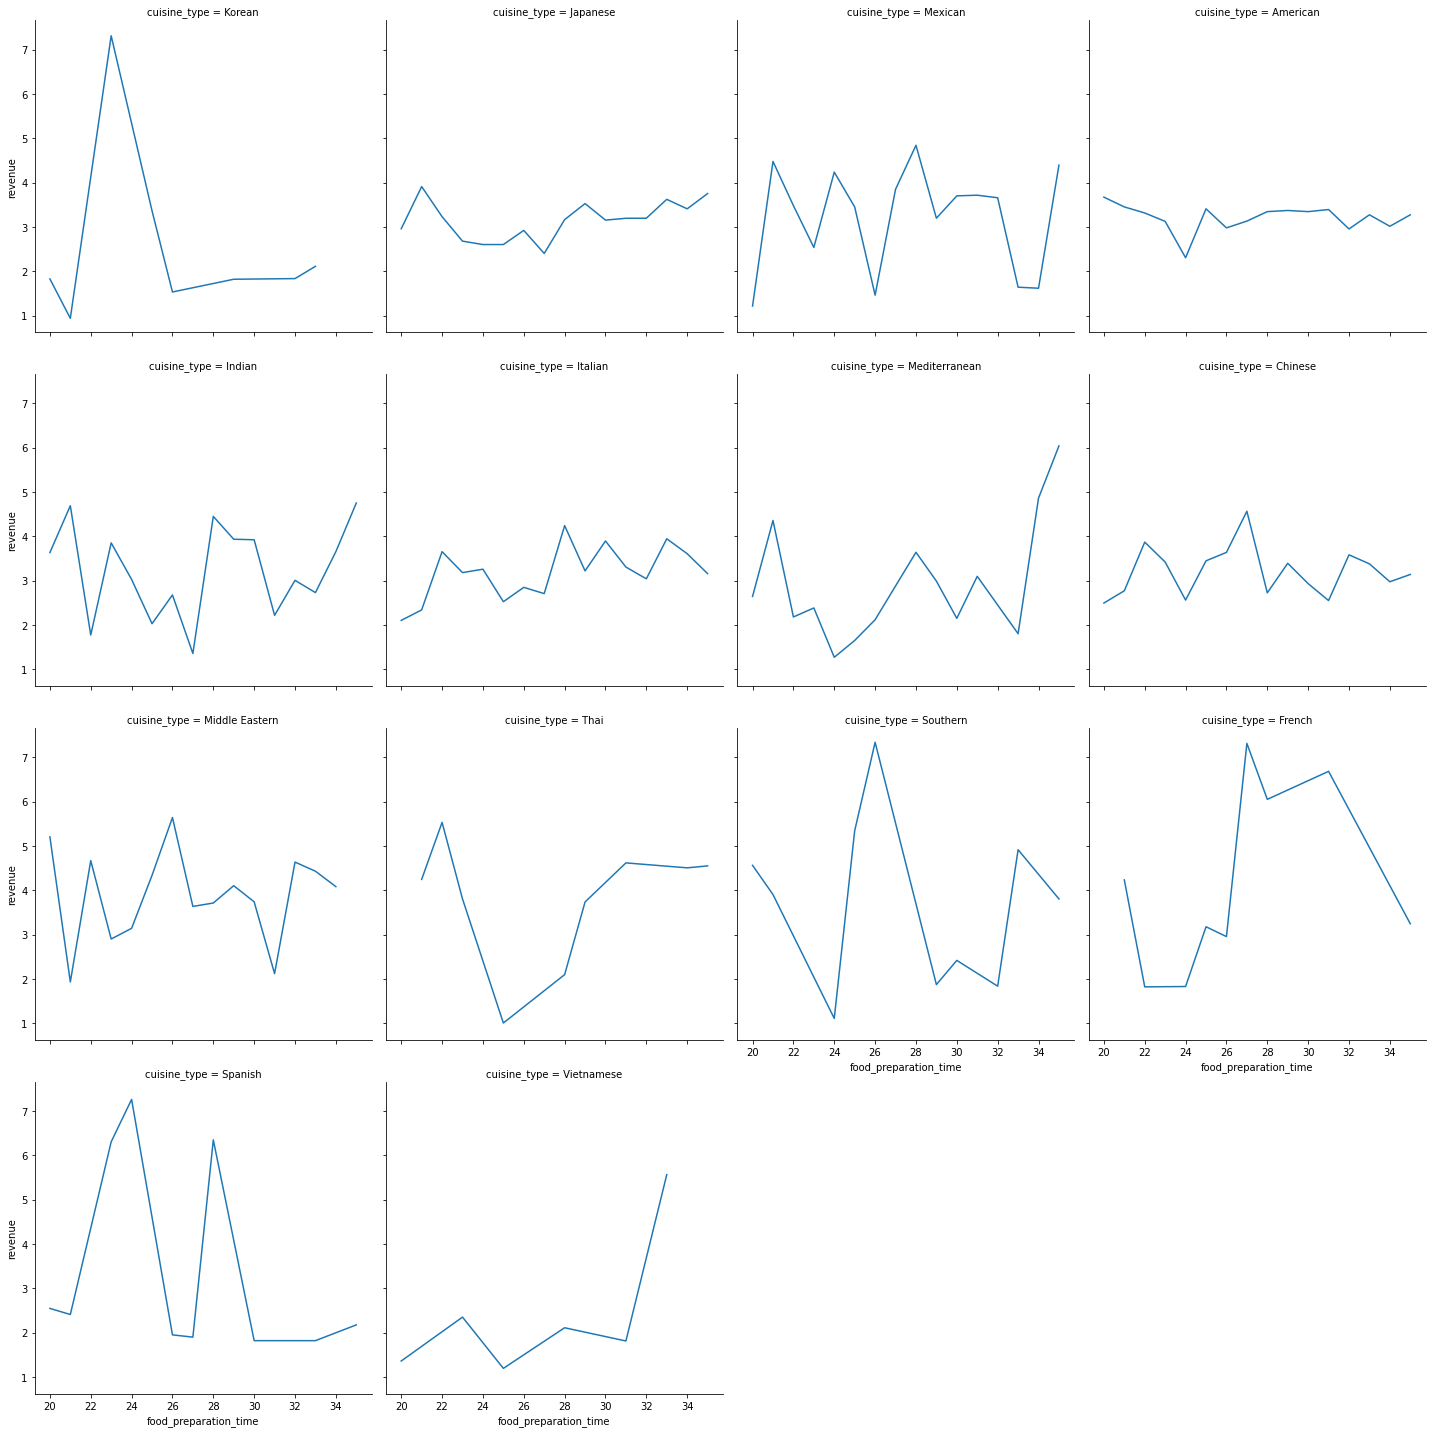

In [ ]:
# To know the relation between revenue and food preperation time and cusine name.
sns.relplot(data= df, x= 'food_preparation_time', y= 'revenue', col= 'cuisine_type', kind= 'line', ci= None, col_wrap= 4)
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
resturents_for_promotion = df[(df['rating'] > 4) & (df['rating'].count() > 50)]

In [ ]:
resturents_for_promotion

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26,1.0770
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5.0,23,22,1.2150
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17,6.0750
...,...,...,...,...,...,...,...,...,...,...
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5.0,21,26,2.4300
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22,2.3505
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,1.8270


There are total 588 resturants which meet the criteria for promotion.

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# To calclate the revenue
df['revenue'] = df['cost_of_the_order'].apply(lambda x: (0.15 * x) if (x < 20 and x > 5) else (0.25 * x))


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [ ]:
revenue = df['revenue'].sum()

In [ ]:
print('The revenue of company from 1898 orders is $', revenue)

The revenue of company from 1898 orders is $ 6176.987999999999


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Getting the Total delivery time including food preperation and delivery time.
df['total_delevered_time'] = df['food_preparation_time'] + df['delivery_time']

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_delevered_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49


In [ ]:

total_orders= 1898
orders_with_60_delivery_time = len(df[df['total_delevered_time'] > 60].index)

In [ ]:
orders_with_60_delivery_time

200

In [ ]:
percentage = (orders_with_60_delivery_time / total_orders) * 100

In [ ]:
percentage

10.537407797681771

In [ ]:
print('The Percentage of orders take more than 60 Minutes is', percentage, '%')

The Percentage of orders take more than 60 Minutes is 10.537407797681771 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# To get the mean of delivery time on Weekends and Weekdays.
df.groupby('day_of_the_week', as_index=False)['delivery_time'].mean()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


Mean delivery time for Weekends  is less than Weekday, It can be due to less traffic on roads on weekend days.

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are high number of orders which are not rated. Users are not tend to rate the food and delivery services.


*   Rating is between 3 and 5, means rating is bwtween average and good. Disapointed cutomers, not give the rating.
*   Average Cost order is vdery low, which shows that customers buying power is low. 
*   Average delivery time is 24, which is high. It should be between 10-15 minutes to get good reviews and orders.
*   Food preperation time of resturants is between 20-35, which is high. and effect the delivery process.
*   Cost of the order highly correlated with revenue. Company needs orders of high value in order to get revenue.
*   If resturants take more time in food preperation, it will possibly receive bad rating.
*   Cost of the order highly correlated with preperation time.
*   10 percent of orders take more than 1 hour to deliver, which is not good sign.
*   American cuisine is more liked on weekend days.
*   Korean, Italian and Mediterenian cusines have orders with very low cost. These cusine are not popular.
*   American, Southern cusine have orders with high cost, these are populae cusines.
*   Company's revenue from aprox 1898 orders is 6.1K which is not bad, but can be increased by giving promotions to customers and improving delivery services.











### Recommendations:

*  Company should give the discouts and easy rating process in order to get more reviews/rating on orders.
*   Company should work with resturnets on policy of preparing food in less time.
*  Company should identify the Cusines with low orders and ratings to resturents sho that they can improve the taste.
The delivery time of orders should be optimized. May by guiding riders with GPS.
*   Riders should use alternate routes with less traffic on working weekdays.
*   Company should give the value to us staisfied customers. So, that thay don't leave without rating and identify the bad performing resturents.





---